In [1]:
from numpy import *
from pylab import *

In [3]:
x = linspace(-5,5,100)
y = cos(x)

Text(0.5,1,'Cos(x)')

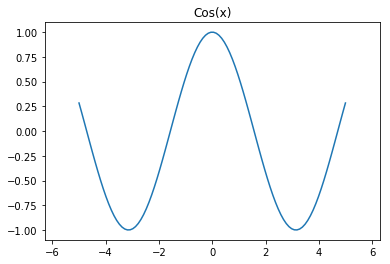

In [8]:
plot(x,y)
xlim(-2*pi,2*pi)
title("Cos(x)")

In [9]:
x = linspace(0,1,1025)
n = 5
# Initialize a matrix of zeroes
Pn = zeros((n+1,len(x)))

In [10]:
print(Pn)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
for i in range(n+1):
    Pn[i] = x**i

In [13]:
print(Pn)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 9.98046875e-01
  9.99023438e-01 1.00000000e+00]
 [0.00000000e+00 9.53674316e-07 3.81469727e-06 ... 9.96097565e-01
  9.98047829e-01 1.00000000e+00]
 [0.00000000e+00 9.31322575e-10 7.45058060e-09 ... 9.94152062e-01
  9.97073173e-01 1.00000000e+00]
 [0.00000000e+00 9.09494702e-13 1.45519152e-11 ... 9.92210358e-01
  9.96099468e-01 1.00000000e+00]
 [0.00000000e+00 8.88178420e-16 2.84217094e-14 ... 9.90272448e-01
  9.95126715e-01 1.00000000e+00]]


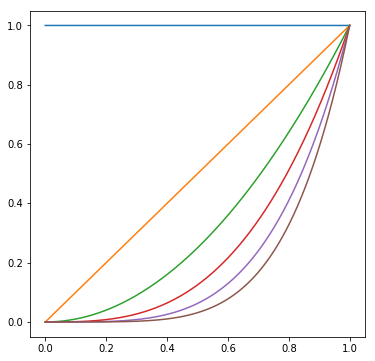

In [18]:
figure(figsize=[6,6])
_ = plot(x,Pn.T)

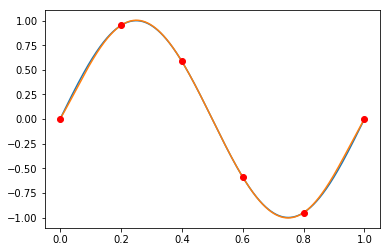

In [28]:
## define the interpolation points
q = linspace(0,1,n+1)
## define the natural basis of the polinomials
A = zeros((n+1,n+1))
for i in range(n+1):
    A[:,i] = q**i
## define the interpolation function
f = lambda x: sin(2*pi*x)
## compute the value of F in the interpolation points
F = f(q)
## solve fot the coefficient of the polinomials
u = linalg.solve(A,F)
## plot the result
_ = plot(x,f(x))
_ = plot(x,Pn.T.dot(u))
_ = plot(q,f(q),'ro')

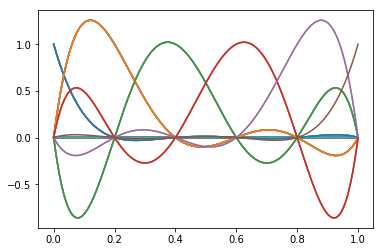

In [32]:
## now we go for lagrange polinomials
Ln = zeros((n+1,len(x)))
for i in range(n+1):
    Ln[i] = product([ (x-q[j])/(q[i]-q[j]) for j in range(n+1) if j!=i], axis=0)
    _ = plot(x,Ln.T)

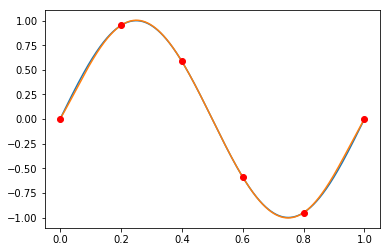

In [33]:
y = Ln.T.dot(f(q))
_ = plot(x,f(x))
_ = plot(x,y)
_ = plot(q, f(q), "ro")

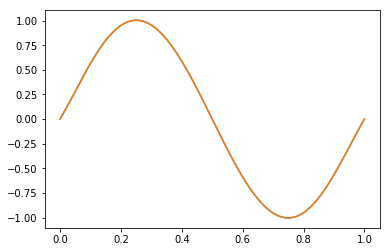

In [37]:
_ = plot(x,y)
_ = plot(x,Pn.T.dot(u))

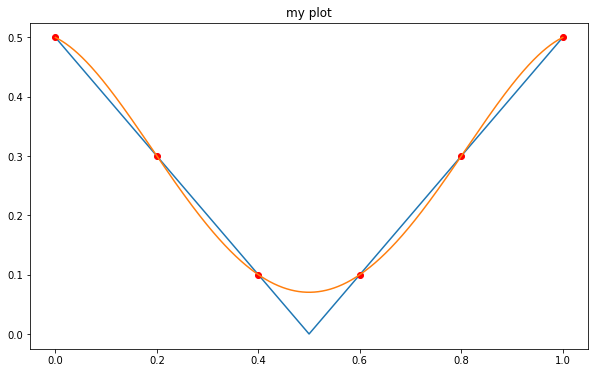

In [47]:
def my_plot(f):
    figure(figsize=[10,6])
    y = Ln.T.dot(f(q))
    _ = plot(x,f(x))
    _ = plot(q,f(q),"ro")
    _ = plot(x,y)
    title("my plot")
    show()

# my_plot(sin)
# my_plot(cos)

## runge counterexample
# runge = lambda x: 1.0/(1+50*(.5-x)**2)
# my_plot(runge)

my_abs = lambda x : abs(x-0.5)
my_plot(my_abs)